In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
cars = pd.read_csv("./data/car2.csv")
cars

cars['EngineType'] = cars['Engine Type']
cars.drop('Engine Type', axis=1, inplace=True)
        
cars

,Brand,Price,Body,Mileage,EngineV,Registration,Year,Model,EngineType
0,BMW,4200.0,sedan,277,2.0,yes,1991,320,Petrol
1,Mercedes-Benz,7900.0,van,427,2.9,yes,1999,Sprinter 212,Diesel
2,Mercedes-Benz,13300.0,sedan,358,5.0,yes,2003,S 500,Gas
3,Audi,23000.0,crossover,240,4.2,yes,2007,Q7,Petrol
4,Toyota,18300.0,crossover,120,2.0,yes,2011,Rav 4,Petrol
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,yes,2014,S 350,Diesel
4341,BMW,6500.0,sedan,1,3.5,yes,1999,535,Petrol
4342,BMW,8000.0,sedan,194,2.0,yes,1985,520,Petrol
4343,Toyota,14200.0,sedan,31,NaN,yes,2014,Corolla,Petrol


In [79]:
print(cars.isnull().sum())
print(cars.describe())

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Registration      0
Year              0
Model             0
EngineType        0
dtype: int64
               Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2.790734  2006.550058
std     25584.242620   105.705797     5.066437     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    86.000000     1.800000  2003.000000
50%     11500.000000   155.000000     2.200000  2008.000000
75%     21700.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000


In [80]:
df = cars
mask = df['Price'].isnull() & df['EngineV'].isnull()
df.drop(df[mask].index, inplace=True)

In [81]:
print(df['Body'].value_counts())

Body
sedan        1649
crossover     900
van           674
other         433
vagon         402
hatch         285
Name: count, dtype: int64


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'EngineV'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

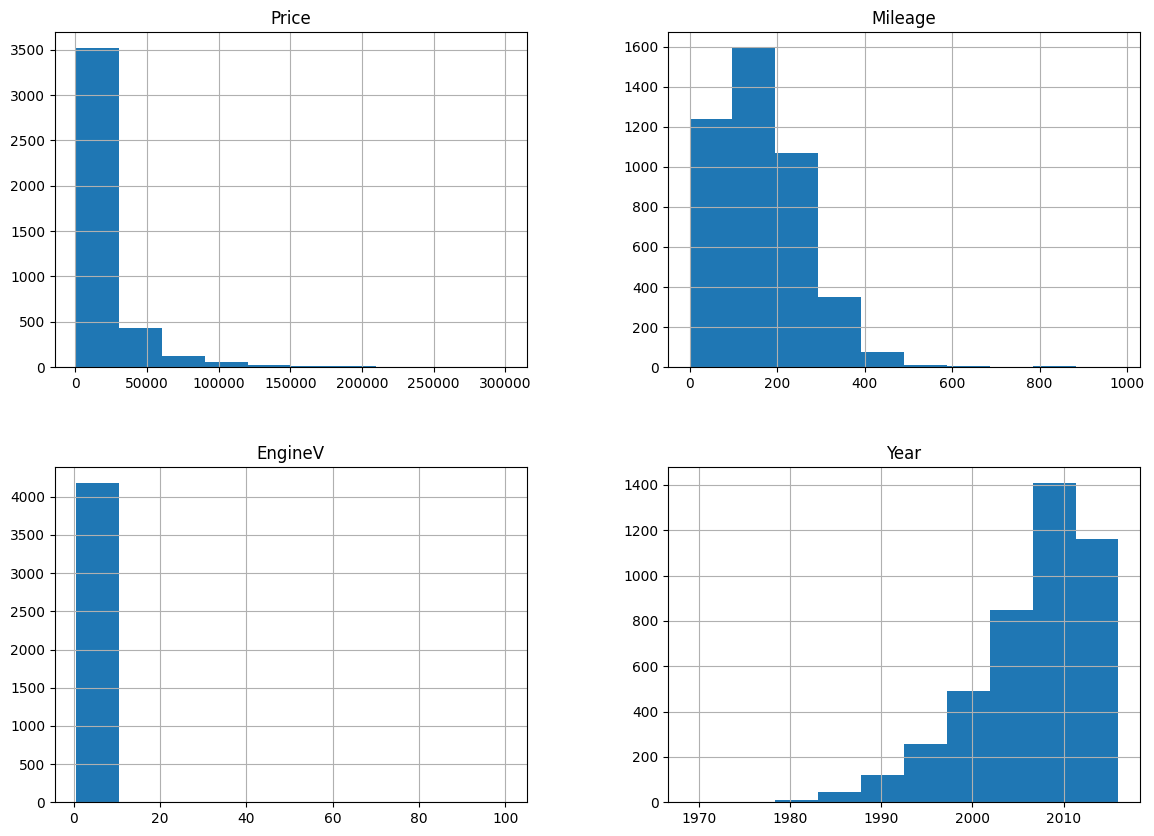

In [82]:
df.hist(figsize=(14,10))



In [83]:
price_outliers = df[df['Price'] > 250000]
print("prices above 250000 ", len(price_outliers))

mileage_outliers = df[(df['Mileage'] < 1) ]
print("mileage < 1", len(mileage_outliers))

year_outliers = df[df['Year'] < 1985]
print("year < 1985", len(year_outliers))

prices above 250000  4
mileage < 1 185
year < 1985 15


In [84]:
def fill_outlers_with_mean(col_name: str, nullcheck = False, thresh = 0, group_feature = 'Model'):
    outliers = df[df[col_name] == thresh] if not nullcheck else df[df[col_name].isnull()]
    
    grouped_data = df.groupby(group_feature)
    mean_by_group = grouped_data[col_name].mean()


    for i, row in outliers.iterrows():
        model = row[group_feature]
        mean_val = mean_by_group[model]
        df.at[i, col_name] = mean_val

# fill_outlers_with_mean(col_name='Mileage')
# fill_outlers_with_mean(col_name='EngineV', nullcheck=True)
# fill_outlers_with_mean(col_name='Price', nullcheck=True)

df = df[~(df == 0).any(axis=1)]

In [85]:

df = df[df['Mileage'] != 0]
df.reset_index(drop=True, inplace=True)

df = df.dropna(subset=['Price'])
df.reset_index(drop=True, inplace=True)


In [86]:
numerical_df = df.select_dtypes(include='number')

# Calculating the correlation matrix
numerical_df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.430561,0.055377,0.468080
Mileage,-0.430561,1.000000,0.025224,-0.627997
EngineV,0.055377,0.025224,1.000000,-0.030749
Year,0.468080,-0.627997,-0.030749,1.000000


In [87]:
# df['BrandModel'] = df['Brand'] + '-' + df['Model']
# df.drop('Brand', inplace=True, axis=1)
df.drop('Model', inplace=True, axis=1)


In [88]:
zero_enginev = df[df['EngineV'].isna()]
df.drop(zero_enginev.index, inplace=True)

In [89]:
categorical_cols = ['Brand', 'Body', 'EngineType', 'Registration']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [90]:

log_price = np.log(df['Price'])
df['LogPrice'] = log_price
df.drop('Price', axis=1, inplace=True)
df.columns

Index(['Mileage', 'EngineV', 'Year', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'EngineType_Gas', 'EngineType_Other', 'EngineType_Petrol',
       'Registration_yes', 'LogPrice'],
      dtype='object')

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('LogPrice', axis=1)
y = df['LogPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42, warm_start=True)

batch_size = 64
num_batches = int(np.ceil(X_train_scaled.shape[0] / batch_size))

for epoch in range(10):  # Number of epochs
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        X_batch = X_train_scaled[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        model.partial_fit(X_batch, y_batch)

y_pred = model.predict(X_test_scaled)

In [93]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Creating LinRegression Model

reg.fit(X_train_scaled, y_train)

LinearRegression()

In [94]:
y_pred_batch = pd.DataFrame(y_pred, columns=['Predicted Target'])

for pred, actual in zip(y_pred, y_test):
    print(pred, '\/', actual)

8.646554344121842 \/ 8.699514748210191
10.135859574661048 \/ 9.947504437952903
8.504858059630811 \/ 8.444622498581401
9.240802495936894 \/ 8.716044050161402
9.071372597670118 \/ 9.024010793784688
9.348960290050071 \/ 9.024010793784688
10.161303268792699 \/ 10.691944912900398
9.672359344146535 \/ 9.680344001221918
9.024071682046864 \/ 9.539644119118783
9.80959888620471 \/ 10.92512880001811
10.092759320153435 \/ 10.540064381607678
8.771554244809181 \/ 8.433811582477187
10.659308591956695 \/ 10.924138299734526
9.676254741824309 \/ 9.6614159913364
9.896921607969649 \/ 9.998752276761909
9.710349448471463 \/ 9.20029003612268
9.611380302820997 \/ 9.425451751593128
8.255966050440827 \/ 8.160518247477505
8.75131362906094 \/ 8.699514748210191
9.777150233730683 \/ 9.98966524877718
8.004609284843383 \/ 7.696212639346407
8.736155423413242 \/ 8.556413904569519
9.390924013271794 \/ 8.922658299524402
10.537924157256096 \/ 10.404262840448617
8.749243015515217 \/ 9.121509158269566
9.212682157883213 \/ 9

In [95]:
y_pred_s = reg.predict(X_test_scaled)
y_pred_s = np.exp(y_pred_s)

y_true = np.exp(y_test)

sum = 0
for p, a in zip(y_pred_s, y_true):
    if abs(p - a) <= 7500 :
        sum += 1

acc = sum / len(y_pred_s) * 100
acc

85.9536082474227